We will use the [Fuel](https://github.com/mila-udem/fuel) library to access datasets. Fuel is designed to provide easy iteration over large datasets, however in this assignment we will only use its ability to download and convert some standard datasets for us.

We will use the following datasets:
1. IRIS https://archive.ics.uci.edu/ml/datasets/Iris available as `fuel.datasets.iris.Iris`
2. MNIST http://yann.lecun.com/exdb/mnist/ available as `fuel.datasets.mnist.MNIST`
3. CIFAR10 http://www.cs.toronto.edu/~kriz/cifar.html available as `fuel.datasets.cifar10.CIFAR10`

On lab computers the datasets have already been downloaded for you into the `/pio/data/data/fuel` directory. Make sure to add it to the `FUEL_DATA_PATH` environment variable!

If you are working from your computer, you can either use the Fuel downloader and converter utulities (http://fuel.readthedocs.org/en/latest/built_in_datasets.html) or download the HDF5 datasets:

1. [Iris](https://drive.google.com/uc?export=download&id=0B5j9vIO_Njwcb2ItV2ZLakR6MEk)
2. [MNIST](https://drive.google.com/uc?export=download&id=0B5j9vIO_NjwcNnYzVTNIVGxaSEk)
3. [CIFAR10](https://drive.google.com/uc?export=download&id=0B5j9vIO_NjwcOEdlU2RtNkc2bW8)


In [6]:
%pylab inline
import sys
sys.path.append('../')
from matplotlib import pyplot
from numpy import *
from common.plotting import *
import scipy

Populating the interactive namespace from numpy and matplotlib


# Problem 1

We have 50000 training, 10000 validation, and 10000 test examples
The examples are pairs of ('features', 'targets'):
The source #0 named "features" is a 4 array with axis: ('batch', 'channel', 'height', 'width')
The source #1 named "targets" is a 2 array with axis: ('batch', 'index')


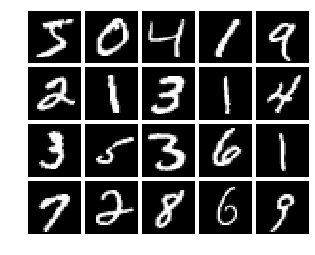

In [7]:
# loading MNIST data

from fuel.datasets.mnist import MNIST
from common.plotting import plot_mat

mnist_train = MNIST(("train",), subset=slice(None,50000))
mnist_validation = MNIST(("train",), subset=slice(50000, None))
mnist_test = MNIST(("test",))

print("We have {} training, {} validation, and {} test examples".format(
    mnist_train.num_examples, mnist_validation.num_examples, mnist_test.num_examples))
      
print("The examples are pairs of {}:".format(mnist_train.sources))

for i, source in enumerate(mnist_train.sources):
    labels = mnist_train.axis_labels[source]
    print('The source #{} named "{}" is a {} array with axis: {}'.format(
        i, source, len(labels), labels))
    
#Note that for larger datasets that are loaded into mameory the data_sources field may not exist!
plot_mat(mnist_train.data_sources[0][:20], cmap='gray')

We have 40000 training, 10000 validation, and 10000 test examples
The examples are pairs of ('features', 'targets'):
The source #0 named "features" is a 4 array with axis: ('batch', 'channel', 'height', 'width')
The source #1 named "targets" is a 2 array with axis: ('batch', 'index')


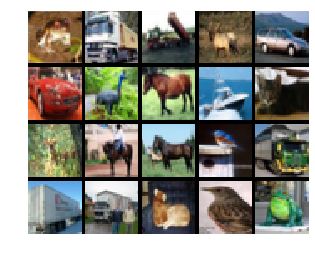

In [8]:
from fuel.datasets.cifar10 import CIFAR10

cifar10_train = CIFAR10(("train",), subset=slice(None,40000))
cifar10_validation = CIFAR10(("train",), subset=slice(40000, None))
cifar10_test = CIFAR10(("test",))

print("We have {} training, {} validation, and {} test examples".format(
    cifar10_train.num_examples, cifar10_validation.num_examples, cifar10_test.num_examples))
      
print("The examples are pairs of {}:".format(cifar10_train.sources))

for i, source in enumerate(mnist_train.sources):
    labels = mnist_train.axis_labels[source]
    print('The source #{} named "{}" is a {} array with axis: {}'.format(
        i, source, len(labels), labels))
    
#Note that for larger datasets that are loaded into mameory the data_sources field may not exist!
plot_mat(cifar10_train.data_sources[0][:20], cmap='gray')

In [27]:
#Extract the data matrices

mnist_train_X = (mnist_train.data_sources[0].reshape(mnist_train.num_examples, -1) / 255.0).astype(np.single)
mnist_train_Y = mnist_train.data_sources[1].ravel()

mnist_valid_X = (mnist_validation.data_sources[0].reshape(mnist_validation.num_examples, -1) / 255.0).astype(np.single)
mnist_valid_Y = mnist_validation.data_sources[1].ravel()

cifar10_train_X = (cifar10_train.data_sources[0].reshape(cifar10_train.num_examples, -1) / 255.0).astype(np.single)
cifar10_train_Y = cifar10_train.data_sources[1].ravel()

cifar10_valid_X = (cifar10_validation.data_sources[0].reshape(cifar10_validation.num_examples, -1) / 255.0).astype(np.single)
cifar10_valid_Y = cifar10_validation.data_sources[1].ravel()


In [28]:
from scipy.stats import mode

def KNN(train_X, train_Y, test_X, test_Y, ks, batch_size=100):
    """
    Compute error rate for various 
    """
    errs = np.zeros((len(ks),))
    for i in range(0,test_Y.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        batch_Y = test_Y[i:i + batch_size]
        print("Examples {}:{} Computing distances... ".format(i, i + batch_size))
        
        X, Y = train_X, batch_X
        
        G = dot(X, Y.T)
        Hx = np.tile(np.sum(square(X), axis = 1).reshape(X.shape[0], 1), (1, Y.shape[0]))
        Hy = np.tile(np.sum(square(Y), axis = 1).reshape(1, Y.shape[0]), (X.shape[0], 1))
        
        dists = Hx + Hy - 2 * G
        
        print("Sorting... ")
        closest = np.argsort(dists,0)

        print("Computing errors...")
        targets = train_Y[closest]
        
        for ki,k in enumerate(ks):
            predictions, unused_counts = mode(targets[:k,:], axis=0)
            predictions = predictions.ravel()

            errs[ki] += numpy.sum(predictions != batch_Y)
        
    errs /= test_Y.shape    
    return np.vstack((ks, errs))



Examples 0:100 Computing distances... 
Sorting... 
Computing errors...
Examples 100:200 Computing distances... 
Sorting... 
Computing errors...
Examples 200:300 Computing distances... 
Sorting... 
Computing errors...
Examples 300:400 Computing distances... 
Sorting... 
Computing errors...
Examples 400:500 Computing distances... 
Sorting... 
Computing errors...
Examples 500:600 Computing distances... 
Sorting... 
Computing errors...
Examples 600:700 Computing distances... 
Sorting... 
Computing errors...
Examples 700:800 Computing distances... 
Sorting... 
Computing errors...
Examples 800:900 Computing distances... 
Sorting... 
Computing errors...
Examples 900:1000 Computing distances... 
Sorting... 
Computing errors...
Examples 1000:1100 Computing distances... 
Sorting... 
Computing errors...
Examples 1100:1200 Computing distances... 
Sorting... 
Computing errors...
Examples 1200:1300 Computing distances... 
Sorting... 
Computing errors...
Examples 1300:1400 Computing distances... 
Sor

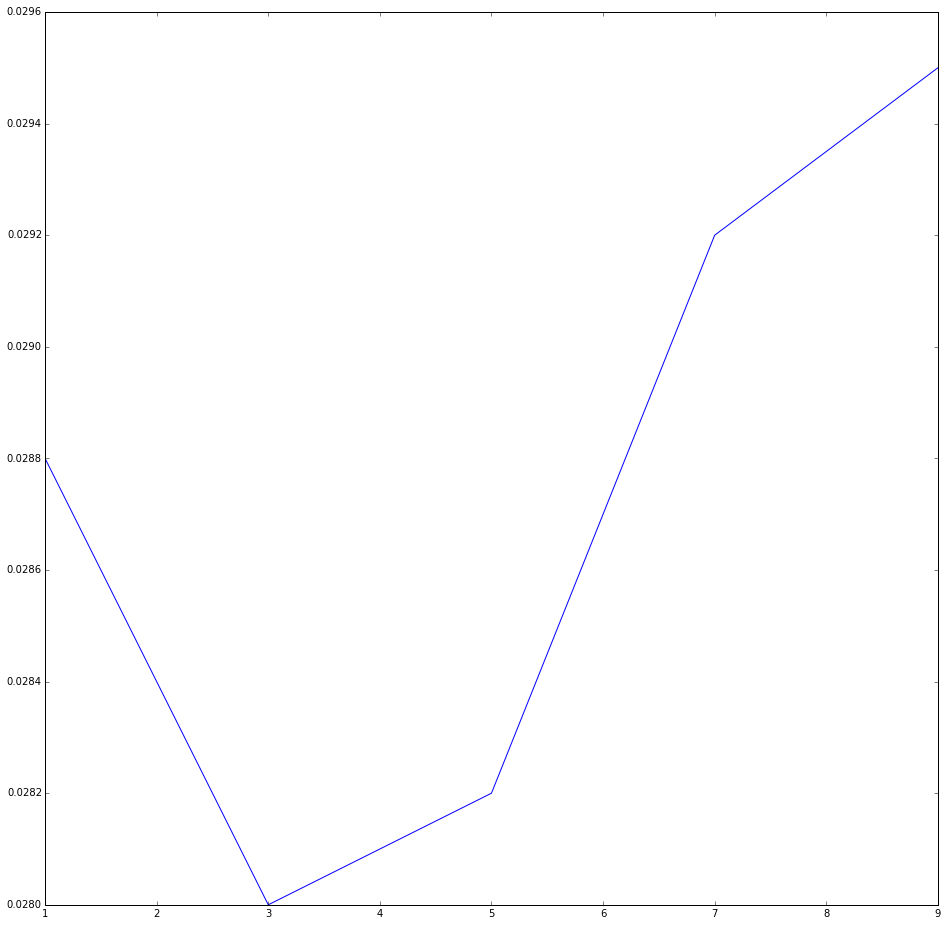

In [29]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(mnist_train_X, mnist_train_Y, mnist_valid_X, mnist_valid_Y, [1,3,5,7,9])
plot(mnist_validation_errs[0,:], mnist_validation_errs[1,:])


In [ ]:
# Now use the best k to compute the test error

print(mnist_validation_errs)

errs = mnist_validation_errs
best_K =  min(zip(errs[0], errs[1]), key = lambda x: x[1])[0]

print(best_K)
mnist_full_train = MNIST(("train",), )

mnist_full_train_X = (mnist_full_train.data_sources[0].reshape(mnist_full_train.num_examples, -1) / 255.0).astype(np.single)
mnist_full_train_Y = mnist_full_train.data_sources[1].ravel()

mnist_test_X = (mnist_test.data_sources[0].reshape(mnist_test.num_examples, -1) / 255.0).astype(np.single)
mnist_test_Y = mnist_test.data_sources[1].ravel()

mnist_test_errs = KNN(mnist_full_train_X, mnist_full_train_Y, mnist_test_X, mnist_test_Y, [best_K])
print("When k={} the test error rate is {:.1f}%".format(mnist_test_errs[0,0], mnist_test_errs[1,0]*100.0))

[[ 1.      3.      5.      7.      9.    ]
 [ 0.0288  0.028   0.0282  0.0292  0.0295]]
3.0
Examples 0:100 Computing distances... 
Sorting... 
Computing errors...
Examples 100:200 Computing distances... 
Sorting... 
Computing errors...
Examples 200:300 Computing distances... 
Sorting... 
Computing errors...
Examples 300:400 Computing distances... 
Sorting... 
Computing errors...
Examples 400:500 Computing distances... 
Sorting... 
Computing errors...
Examples 500:600 Computing distances... 
Sorting... 
Computing errors...
Examples 600:700 Computing distances... 
Sorting... 
Computing errors...
Examples 700:800 Computing distances... 
Sorting... 
Computing errors...
Examples 800:900 Computing distances... 
Sorting... 
Computing errors...
Examples 900:1000 Computing distances... 
Sorting... 
Computing errors...
Examples 1000:1100 Computing distances... 
Sorting... 
Computing errors...
Examples 1100:1200 Computing distances... 
Sorting... 
Computing errors...

Examples 0:100 Computing distances... 
Sorting... 
Computing errors...
Examples 100:200 Computing distances... 
Sorting... 
Computing errors...
Examples 200:300 Computing distances... 
Sorting... 
Computing errors...
Examples 300:400 Computing distances... 
Sorting... 
Computing errors...
Examples 400:500 Computing distances... 
Sorting... 
Computing errors...
Examples 500:600 Computing distances... 
Sorting... 
Computing errors...
Examples 600:700 Computing distances... 
Sorting... 
Computing errors...
Examples 700:800 Computing distances... 
Sorting... 
Computing errors...
Examples 800:900 Computing distances... 
Sorting... 
Computing errors...
Examples 900:1000 Computing distances... 
Sorting... 
Computing errors...
Examples 1000:1100 Computing distances... 
Sorting... 
Computing errors...
Examples 1100:1200 Computing distances... 
Sorting... 
Computing errors...
Examples 1200:1300 Computing distances... 
Sorting... 
Computing errors...
Examples 1300:1400 Computing distances... 
Sor

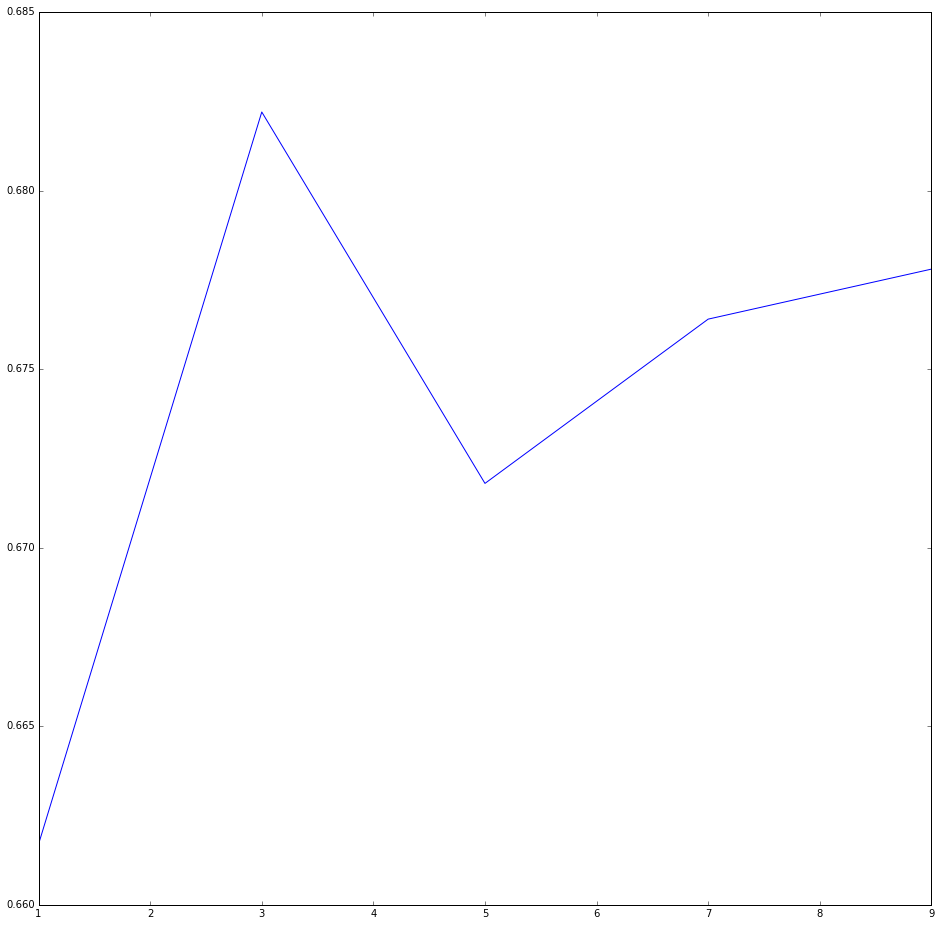

In [ ]:
cifar10_validation_errs = KNN(cifar10_train_X, cifar10_train_Y, cifar10_valid_X, cifar10_valid_Y, [1,3,5,7,9])
plot(cifar10_validation_errs[0,:], cifar10_validation_errs[1,:])

In [ ]:
errs = cifar10_validation_errs
best_K =  min(zip(errs[0], errs[1]), key = lambda x: x[1])[0]

print(best_K)
cifar10_full_train = CIFAR10(("train",), )

cifar10_full_train_X = (cifar10_full_train.data_sources[0].reshape(cifar10_full_train.num_examples, -1) / 255.0).astype(np.single)
cifar10_full_train_Y = cifar10_full_train.data_sources[1].ravel()

cifar10_test_X = (cifar10_test.data_sources[0].reshape(cifar10_test.num_examples, -1) / 255.0).astype(np.single)
cifar10_test_Y = cifar10_test.data_sources[1].ravel()

cifar10_test_errs = KNN(cifar10_full_train_X, cifar10_full_train_Y, cifar10_test_X, cifar10_test_Y, [best_K])
print("When k={} the test error rate is {:.1f}%".format(cifar10_test_errs[0,0], cifar10_test_errs[1,0]*100.0))

# Problem 2

In [ ]:

def plot_fun(f, x0, x1, c, n = 1000, **kwargs):
    X = linspace(x0, x1, n)
    Y = [f(x) for x in X]

    pyplot.plot(X, Y, c)

def plot_poly(P, x0, x1, c, n = 1000, **kwargs):
    def f(x):
        return sum(p * x ** i for i, p in enumerate(P))

    plot_fun(f, x0, x1, c, n, **kwargs)

def generate(n):
    X = numpy.random.uniform(0, 10, n)
    Y = numpy.array([numpy.random.normal(1 + 20 * x - 1.3 * x ** 2, 7) for x in X])
    return X, Y

X, Y = generate(30)

def fit(X, Y, d):
    X = numpy.array([[x ** i for i in range(d + 1)] for x in X]).T
    Y = Y.copy().reshape(1, Y.shape[0])
    Theta = dot(dot(linalg.inv(dot(X, X.T)), X), Y.T)
    return Theta

pyplot.scatter(X, Y)

print(fit(X, Y, 2))

plot_poly(fit(X, Y, 0), 0, 10, 'tan')
plot_poly(fit(X, Y, 1), 0, 10, 'r')
plot_poly(fit(X, Y, 2), 0, 10, 'g')
plot_poly(fit(X, Y, 3), 0, 10, 'b')
plot_poly(fit(X, Y, 4), 0, 10, 'tan')

pyplot.show()


# Problem 3

In [9]:
def numerical_gradient(f, X, delta=1e-4):
    X = np.array(X) # force a copy
    R = np.zeros_like(X)
    XF = X.ravel() #get the views
    RF = R.ravel() 
    for i in range(XF.shape[0]):
        xold = XF[i]
        XF[i] = xold+delta
        fp, unused_grad = f(X)
        XF[i] = xold-delta
        fn, unused_grad = f(X)
        XF[i] = xold
        RF[i] = (fp-fn)/(2*delta)
    return R

def check_gradient(f, X, delta=1e-4, prec=1e-6):
    fval, fgrad = f(X)
    num_grad = numerical_gradient(f, X, delta=delta)
    diffnorm = np.sqrt(np.sum((fgrad-num_grad)**2))
    gradnorm = np.sqrt(np.sum(fgrad**2))
    if gradnorm>0:
        if not (diffnorm < prec or diffnorm/gradnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    else:
        if not (diffnorm < prec):
            raise Exception("Numerical and anaylical gradients differ: %s != %s!" %
                            (num_grad, fgrad))
    return True

In [10]:
# A sample function for debugging purposes

def quadratic(X):
    value = X[0]**2 + 2*X[1]**2
    grad = np.array([2*X[0], 4*X[1]])
    return (value, grad)


# Let's check if the gradientis correctly computed
check_gradient(quadratic, np.array([0,0]))
check_gradient(quadratic, np.array([1.0,1.0]))


True

In [11]:
#
# Fill in the details of the gradient computation
#

def GD(f, Theta0, alpha, stop_tolerance=1e-20, max_steps=1000000):
    history = [Theta0]
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        value, gradient = f(Theta)
        
        if abs(previous_value - value) < stop_tolerance: 
            break
        
        Theta = Theta - alpha * gradient * value
        
        history.append(Theta)

        step += 1
        
    return Theta, history

In [12]:
#
# Test the GD procedure on the quadratic function
#

Xopt, Xhist = GD(quadratic, np.array((1,1)), 1e-1)
print("Found optimum at {} in {} steps (true minimum is at [0,0])".format(Xopt, len(Xhist)))


Found optimum at [  1.58105720e-03  -3.05868560e-06] in 1000001 steps (true minimum is at [0,0])


Found optimum at [ 0.81133073  0.65741417] in 1000001 steps (true minimum is at [1,1])


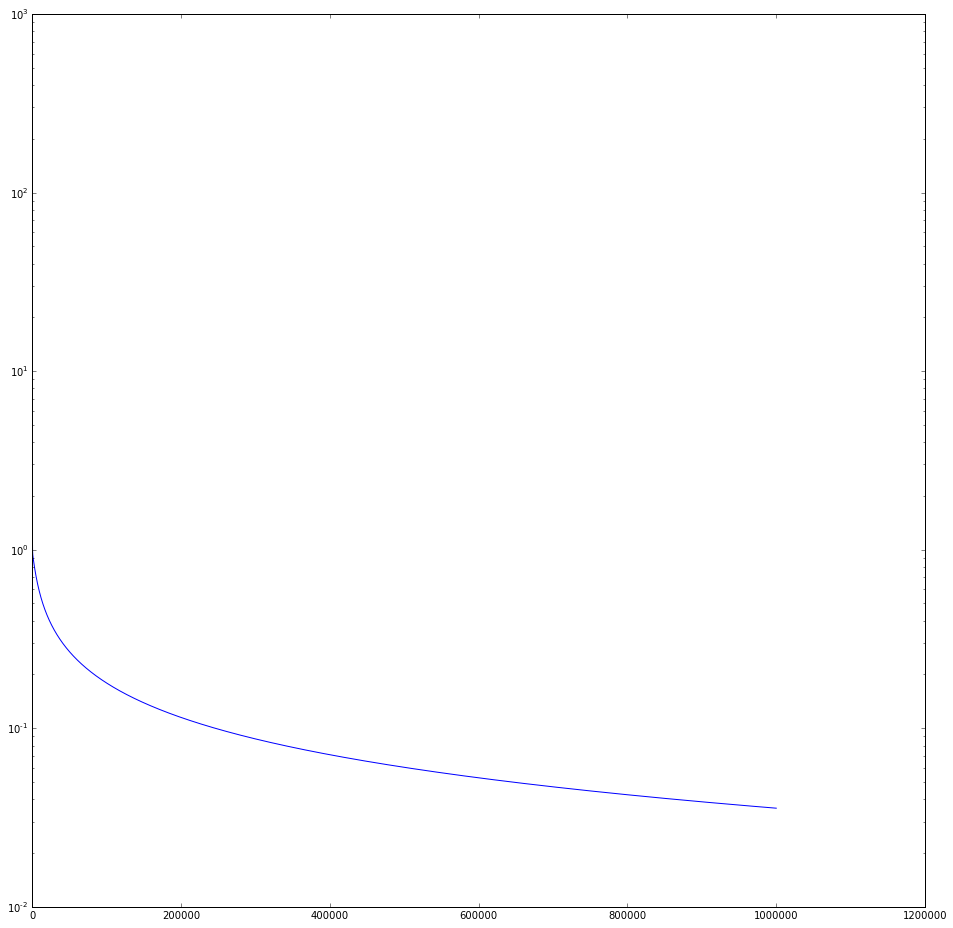

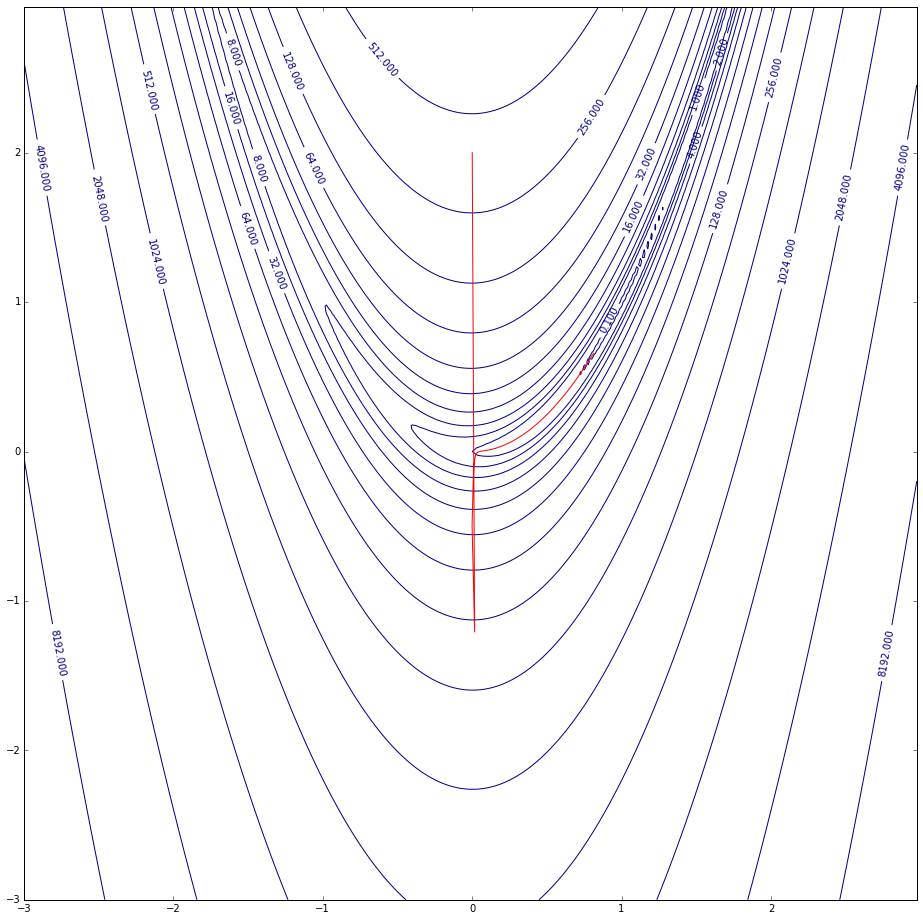

In [23]:
#
# Now implement the Rosenbrock function 
#

def rosenbrock(x, a = 1, b = 100):
    val = (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2
    grad_x = - 2 * a + 2 * x[0] - 4 * b * x[0] * x[1] + 4 * b * x[0] ** 3
    grad_y = 2 * b * x[1] - 2 * b * x[0] ** 2
    return val, array((grad_x, grad_y))

#
# And test its gradient
#
check_gradient(rosenbrock, np.array([0.,0.]), delta=1e-8)
check_gradient(rosenbrock, np.array([1.0,1.0]), delta=1e-8)

#
# Find the optimum
#

X0= (0.,2.)
Xopt, Xhist = GD(rosenbrock, X0, alpha=2e-5, stop_tolerance=1e-10, max_steps = 1000000)
Xhist = np.array(Xhist)

print("Found optimum at {} in {} steps (true minimum is at [1,1])".format(Xopt, len(Xhist)))

pylab.rcParams['figure.figsize'] = (16.0, 16.0)

#
# Plot the value over iterations
#

X = [i for i in range(1, len(Xhist) + 1)]
Y = [rosenbrock(x)[0] for x in Xhist]

plot(X, Y)
pyplot.yscale('log')
pyplot.show()

plt.figure()
delta = 0.025
X = np.arange(-3.0, 3.0, delta)
Y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(X, Y)

Z = numpy.array([ rosenbrock([x, y])[0] for x, y in zip(X, Y)  ])
# plotted contours at exponential intervals instead of taking log of function
CS = plt.contour(X, Y, Z, [0.1] + [pow(2, x) for x in range(30)])
plt.clabel(CS, inline=1, fontsize=10)

X, Y = zip(*Xhist)

plt.plot(X, Y, 'r')

#
# Make a contour plot
#
# you may want to use functions: meshgrid, contour
#





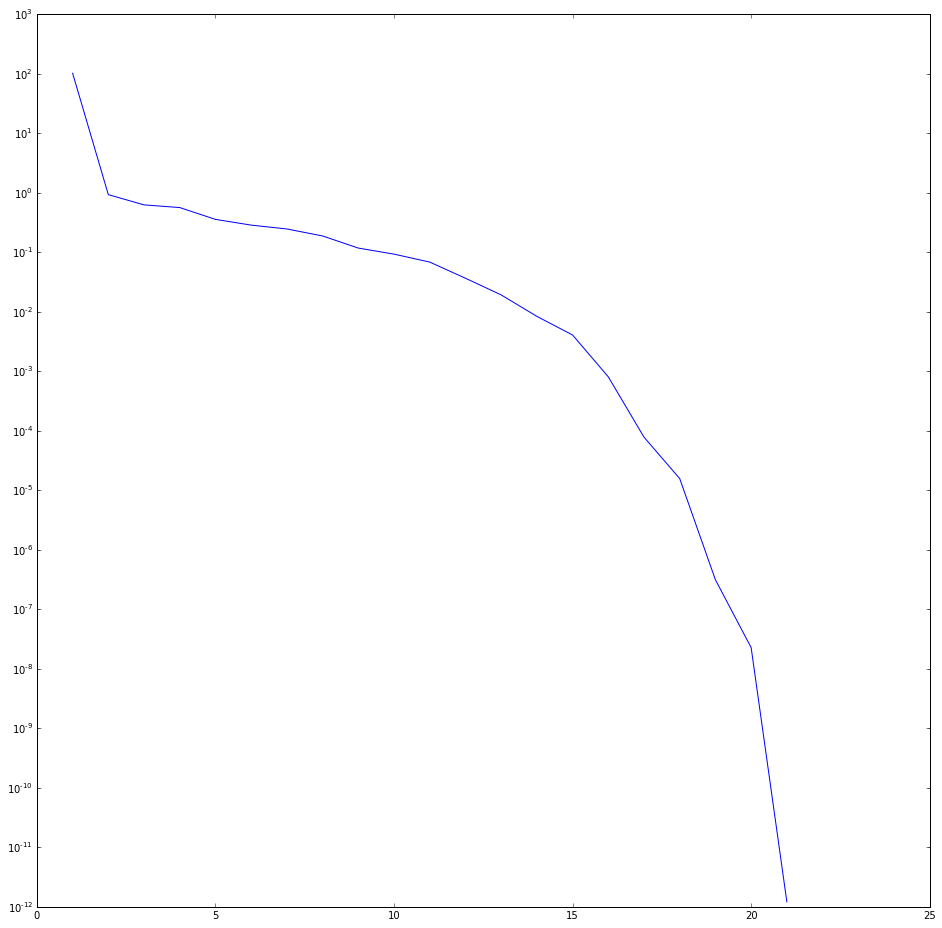

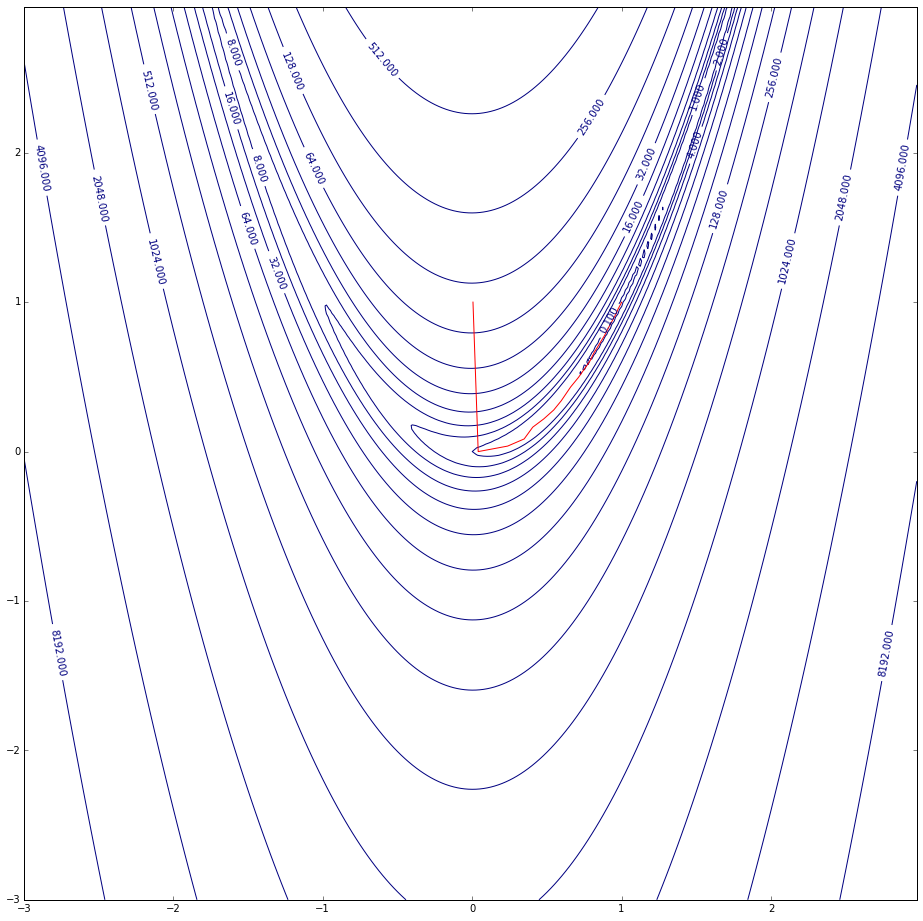

In [21]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#
#

import scipy.optimize

pylab.rcParams['figure.figsize'] = (16.0, 16.0)

H = []

def callback(x):
    H.append(x.copy())

scipy.optimize.fmin_l_bfgs_b(rosenbrock, (0., 2.), callback = callback)

X = [i for i in range(1, len(H) + 1)]
Y = [rosenbrock(x)[0] for x in H]

plot(X, Y)
pyplot.yscale('log')
pyplot.show()

delta = 0.025
X = np.arange(-3.0, 3.0, delta)
Y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(X, Y)

Z = numpy.array([ rosenbrock([x, y])[0] for x, y in zip(X, Y)  ])
# plotted contours at exponential intervals instead of taking log of function
CS = plt.contour(X, Y, Z, [0.1] + [pow(2, x) for x in range(30)])
plt.clabel(CS, inline=1, fontsize=10)

X, Y = zip(*H)

plt.plot(X, Y, 'r')


# Problem 2c

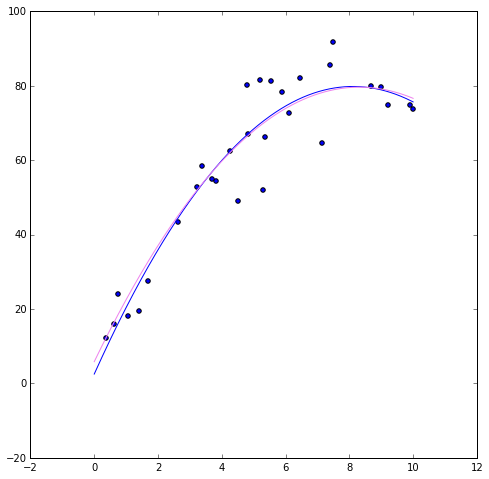

In [303]:
def plot_fun(f, x0, x1, c, n = 1000, **kwargs):
    X = linspace(x0, x1, n)
    Y = [f(x) for x in X]

    pyplot.plot(X, Y, c)

def plot_poly(P, x0, x1, c, n = 1000, **kwargs):
    def f(x):
        return sum(p * x ** i for i, p in enumerate(P))

    plot_fun(f, x0, x1, c, n, **kwargs)

def generate(n):
    X = numpy.random.uniform(0, 10, n)
    Y = numpy.array([numpy.random.normal(1 + 20 * x - 1.3 * x ** 2, 7) for x in X])
    return X, Y

X, Y = generate(30)

def fit(X, Y, d):
    X = numpy.array([[x ** i for i in range(d + 1)] for x in X]).T
    Y = Y.copy().reshape(1, Y.shape[0])
    Theta = dot(dot(linalg.inv(dot(X, X.T)), X), Y.T)
    return Theta

def fit_gd(X, Y, d, alpha = 1e-10, s = 1000):
    X = numpy.array([[x ** i for i in range(d + 1)] for x in X]).T
    Y = Y.copy().reshape(1, Y.shape[0])
    
    def f(Theta):
        M = dot(Theta.T, X) - Y
        R = dot(M, M.T)
        G = - 2 * dot(X, Y.T) + 2 * dot(dot(X, X.T), Theta)
        return R, G
    
    Theta = array([0 for i in range(d + 1)]).reshape(d + 1, 1)
    
    R, H = GD(f, Theta, alpha=alpha, stop_tolerance=1e-10, max_steps = s)
        
    return R
        
pyplot.scatter(X, Y)

plot_poly(fit_gd(X, Y, 0, 1e-10, 5000), 0, 10, 'yellow')

plot_poly(fit(X, Y, 1), 0, 10, 'b')
plot_poly(fit_gd(X, Y, 1, 1e-10, 5000), 0, 10, 'violet')

plot_poly(fit(X, Y, 2), 0, 10, 'b')
plot_poly(fit_gd(X, Y, 2, 2e-11, 100000), 0, 10, 'violet')

plot_poly(fit(X, Y, 3), 0, 10, 'b')
plot_poly(fit_gd(X, Y, 3, 1e-12, 100000), 0, 10, 'violet')

pyplot.show()

# Problem 4

In [243]:
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

from sklearn import datasets
iris = datasets.load_iris()
print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


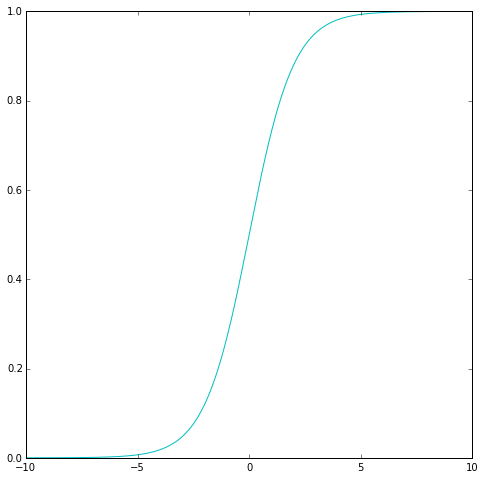

In [121]:
def sigma(x):
    return 1 / (1 + numpy.exp(-x))

plot_fun(sigma, -10, 10, 'c')

In [122]:

#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    #note: this creates a Pyton callable - i.e. an abject that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1)
        
        #
        # Fill in negative log likelihood computation
        # and gradient computation
        #
        # Properly implemented, this takes about 3 lines of code!
        #
        
        hTheta = sigma(dot(ThetaR.T, X))
        
        nll = - numpy.sum(Y * numpy.log(hTheta) + (1 - Y) * numpy.log(1 - hTheta))
        
        grad = dot(X, (hTheta - Y).T)
        
        #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg = LogisticRegressionCost(IrisX, IrisY)

Theta0 = np.zeros((3))
check_gradient(iris_log_reg, Theta0)

#
# Maybe check the gradients at a few other points too?
#


#
# Call a solver
#

ThetaOpt = scipy.optimize.fmin_l_bfgs_b(iris_log_reg, Theta0)[0]

#
# TODO: also tru f_min_lbfsgb??
#

check_gradient(iris_log_reg, ThetaOpt)


#
# Now plot the found separation line 
# 



True

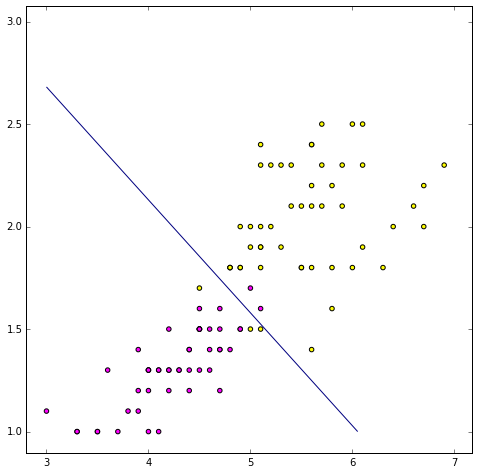

In [132]:


scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')

delta = 0.025
X = np.arange(3.0, 7.0, delta)
Y = np.arange(1.0, 3.0, delta)

X, Y = np.meshgrid(X, Y)

Z = numpy.array([ sigma(ThetaOpt[0] + ThetaOpt[1] * x + ThetaOpt[2] * y) for x, y in zip(X, Y)  ])

CS = plt.contour(X, Y, Z, [0.5])




# Problem 5

The Maximum Likelihood principle doesn't work this time because we do not have enough samples.

$p(Lc|N) = \begin{cases}
    0 & \mbox{if } N < c \\ 
    \frac{1}{N} & \mbox{otherwise } . 
\end{cases} $

$p_0(N) = \frac{1}{N^\alpha}\frac{1}{\zeta (\alpha, 1)}$


$\Sigma_{N=c}^\infty \frac{1}{N^\alpha} = \Sigma_{N=0}^\infty \frac{1}{(N + c)^\alpha} = \zeta(\alpha, c)$

$p_1(N|Lc) 
= \frac{p(Lc|N)p(N)}{\Sigma_{M} p(Lc|M)p(M) } 
= \frac{\frac{1}{N^{\alpha + 1}}\frac{1}{\zeta(\alpha, 1)}}{\Sigma_M  \frac{1}{M^{\alpha + 1}}\frac{1}{\zeta(\alpha, 1)}}
= \frac{\frac{1}{N^{\alpha + 1}}}{\zeta(\alpha + 1, c)}
= {\frac{1}{N^{\alpha + 1}}}\frac{1}{\zeta(\alpha + 1, c)}, \mbox{ for } c \le N$



$E_1[N|Lc] 
= \Sigma_N N p_1(N|Lc) 
= \Sigma_N \frac{N}{N^{\alpha + 1}}\frac{1}{\zeta(a + 1, c)}
= \Sigma_N \frac{1}{N^{\alpha}}\frac{1}{\zeta(a + 1, c)}
= \frac{\zeta(a, c)}{\zeta(a + 1, c)}$




$E_5[N|Lc] 
= \Sigma_N N p_1(N|Lc) 
= \Sigma_N \frac{N}{N^{\alpha + 1}}\frac{1}{\zeta(a + 5, c)}
= \Sigma_N \frac{1}{N^{\alpha}}\frac{1}{\zeta(a + 5, c)}
= \frac{\zeta(a + 4, c)}{\zeta(a + 5, c)}$


544.520368014
61.5838453466


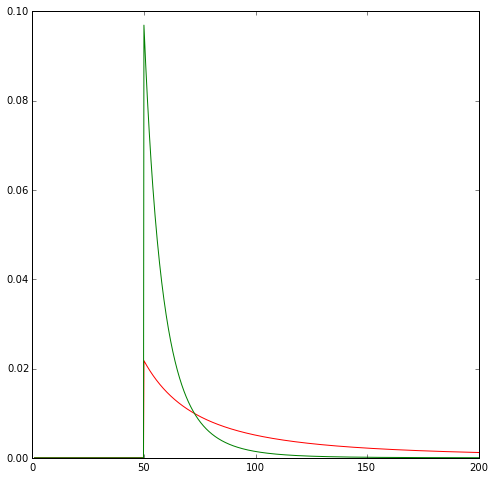

In [240]:
alpha = 1.1

def powlaw(x, alpha, c, n):
    return 0 if x < c else 1 / (x ** (alpha + n) * scipy.special.zeta(alpha + n, c))
    
def p1(x):
    return powlaw(x, alpha, 50.0, 1.0)

def p5(x):
    return powlaw(x, alpha, 50.0, 5.0)

print(scipy.special.zeta(alpha, 50) / scipy.special.zeta(alpha + 1, 50))
print(scipy.special.zeta(alpha + 4, 50) / scipy.special.zeta(alpha + 5, 50))

plot_fun(p1, 1, 200, 'r')
plot_fun(p5, 1, 200, 'g')
